In [51]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd


In [49]:
df= pd.read_csv('mnist_train1.csv')
x_train = df.loc[:, df.columns != '5']
x_train1 = x_train.to_numpy()
x_train1 = x_train1/ 255
x_train2=x_train1.reshape(-1,28,28)
x_train2.shape

(59999, 28, 28)

In [29]:
y_train = df.loc[:, df.columns == '5']
y_train1= y_train.to_numpy()
y_train2 = y_train1.flatten()
y_train2.shape


(59999,)

In [32]:
df1= pd.read_csv('mnist_test.csv')
df1.head(10)

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
y_test = df1.loc[:, df1.columns == '7']
y_test1= y_test.to_numpy()
y_test2 = y_test1.flatten()
y_test2.shape

(9999,)

In [34]:
x_test = df1.loc[:, df1.columns != '7']
x_test1= x_test.to_numpy()
x_test1 = x_test1 / 255
x_test2 = x_test1.reshape(-1,28,28)
x_test2.shape

(9999, 28, 28)

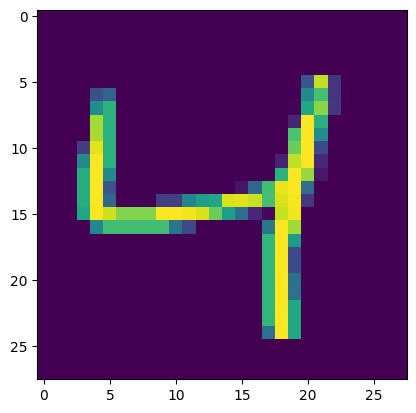

In [36]:
import matplotlib.pyplot as plt
plt.imshow(x_train2[1])

In [38]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

C:\Users\Entezar\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [42]:
history = model.fit(x_train2,y_train2,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8437 - loss: 0.5204 - val_accuracy: 0.9539 - val_loss: 0.1561
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9607 - loss: 0.1314 - val_accuracy: 0.9667 - val_loss: 0.1126
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9732 - loss: 0.0890 - val_accuracy: 0.9693 - val_loss: 0.1087
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9811 - loss: 0.0611 - val_accuracy: 0.9687 - val_loss: 0.1035
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9860 - loss: 0.0464 - val_accuracy: 0.9736 - val_loss: 0.0972
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9894 - loss: 0.0375 - val_accuracy: 0.9715 - val_loss: 0.1034
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9904 - loss: 0.0299 - val_accuracy: 0.9740 - val_loss: 0.1017
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9920 - loss: 0.0240 - 

In [44]:
y_prob = model.predict(x_test2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step


In [45]:
y_pred = y_prob.argmax(axis=1)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9764976497649765

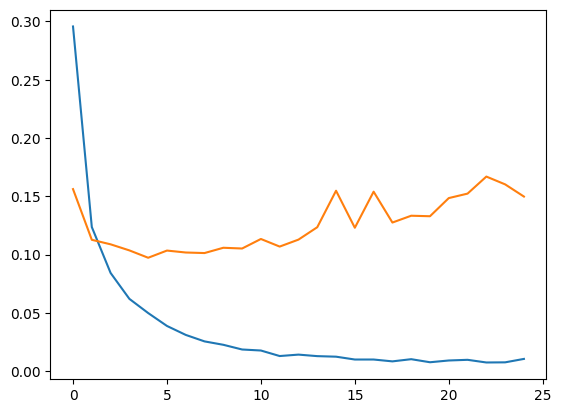

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

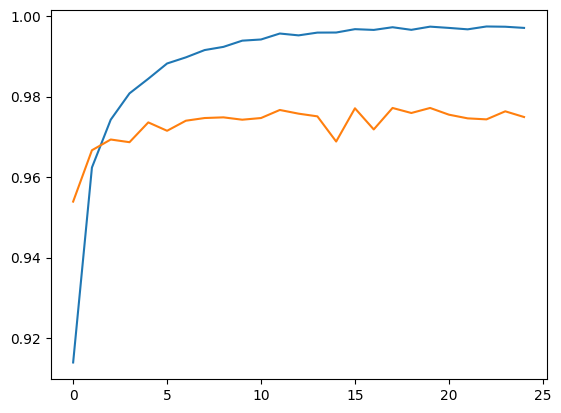

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

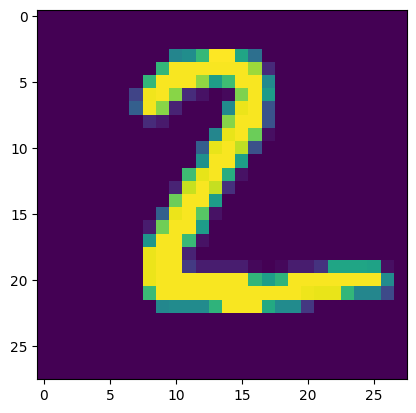

In [58]:
plt.imshow(x_test2[0])

In [59]:
model.predict(x_test2[0].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([2], dtype=int64)

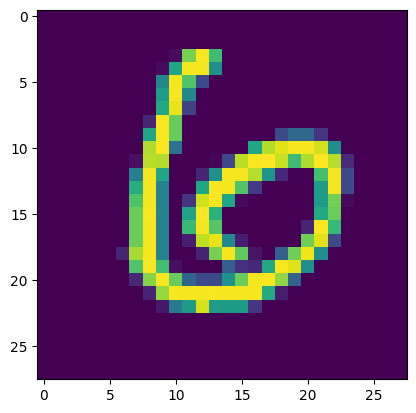

In [60]:
plt.imshow(x_test2[10])

In [61]:
model.predict(x_test2[10].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([6], dtype=int64)

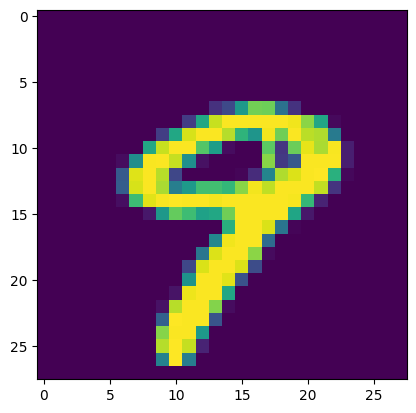

In [62]:
plt.imshow(x_test2[8])

In [63]:
model.predict(x_test2[8].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([9], dtype=int64)